In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


best_school_per_year = pd.read_csv("/best_school_per_year.csv")
best_schools_streamwise = pd.read_csv("/best_schools_streamwise.csv")
fastest_growing_school = pd.read_csv("/fastest_growing_school.csv")
highest_improvement = pd.read_csv("/highest_improvement.csv")
rank_comparison_2020 = pd.read_csv("/rank_comparison_2020.csv")
student_category_counts = pd.read_csv("/student_category_counts.csv")
top_performers = pd.read_csv("/top_performers.csv")

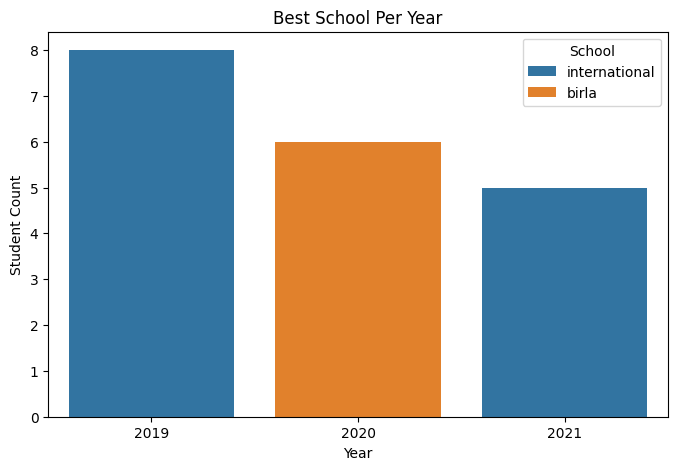

In [7]:
# 6 Best School per Year (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='Best_School_Student_Count', hue='School', data=best_school_per_year)
plt.title("Best School Per Year")
plt.ylabel('Student Count')
plt.show()

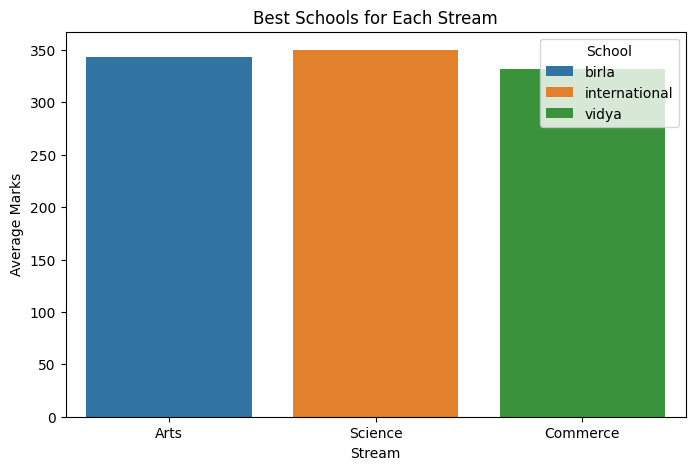

In [11]:
# 4 Best Schools Streamwise (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x="Stream", y="Avg_Marks", hue="School", data=best_schools_streamwise)
plt.title("Best Schools for Each Stream")
plt.ylabel('Average Marks')
plt.show()

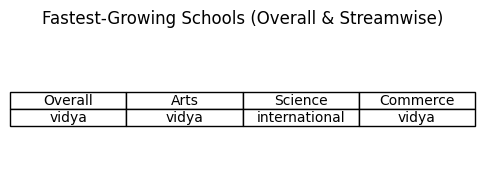

In [13]:
# 7 Display as a Table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figure size
ax.axis('tight')
ax.axis('off')
ax.table(cellText=fastest_growing_school.values, colLabels=fastest_growing_school.columns, cellLoc='center', loc='center')

plt.title("Fastest-Growing Schools (Overall & Streamwise)")
plt.show()

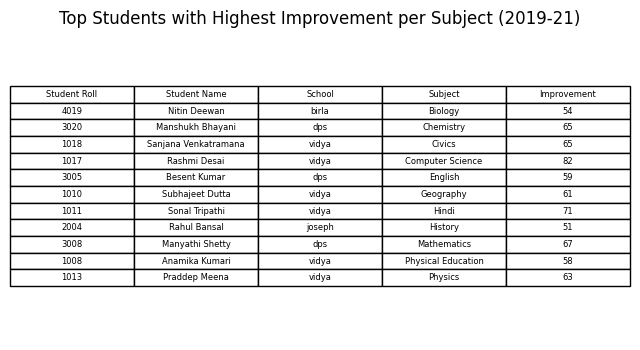

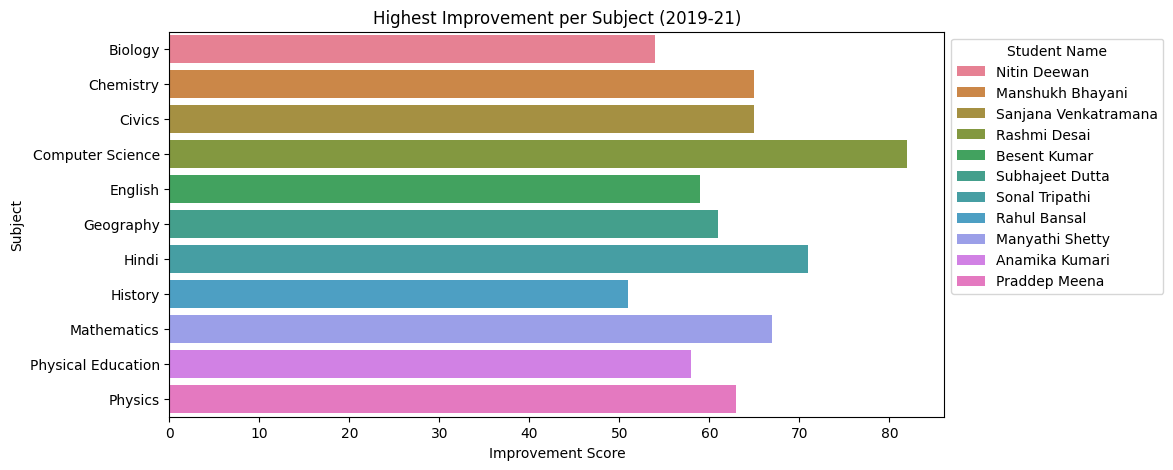

In [15]:
# 3 Find the top student for each subject (max improvement)
top_improvement = highest_improvement.loc[highest_improvement.groupby("Subject")["Improvement"].idxmax()]

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=top_improvement.values, colLabels=top_improvement.columns, cellLoc='center', loc='center')

plt.title("Top Students with Highest Improvement per Subject (2019-21)")
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x="Improvement", y="Subject", hue="Student Name", data=top_improvement, dodge=False)
plt.xlabel("Improvement Score")
plt.ylabel("Subject")
plt.title("Highest Improvement per Subject (2019-21)")
plt.legend(title="Student Name", bbox_to_anchor=(1, 1))
plt.show()

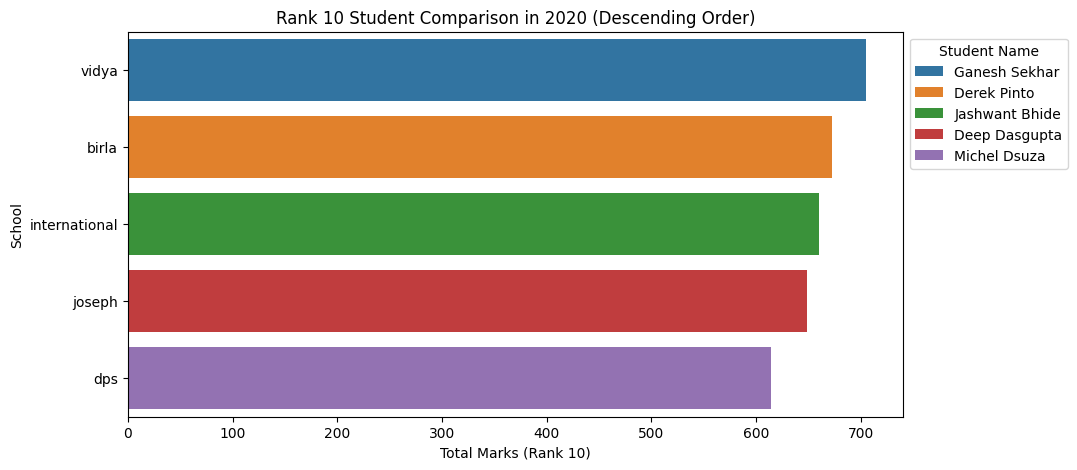

In [23]:
# # 2 Rank Comparison (Bar Chart)


rank_comparison_2020 = pd.read_csv("/rank_comparison_2020.csv")


rank_comparison_2020 = rank_comparison_2020.sort_values(by="Total_Marks", ascending=False)


plt.figure(figsize=(10, 5))
sns.barplot(x="Total_Marks", y="School", data=rank_comparison_2020, hue="Student Name", dodge=False)


plt.xlabel("Total Marks (Rank 10)")
plt.ylabel("School")
plt.title("Rank 10 Student Comparison in 2020 (Descending Order)")
plt.legend(title="Student Name", bbox_to_anchor=(1, 1))

plt.show()

<ipython-input-24-09fc2a4255a7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Student_Count", y="School", data=best_school_per_year, palette="coolwarm")


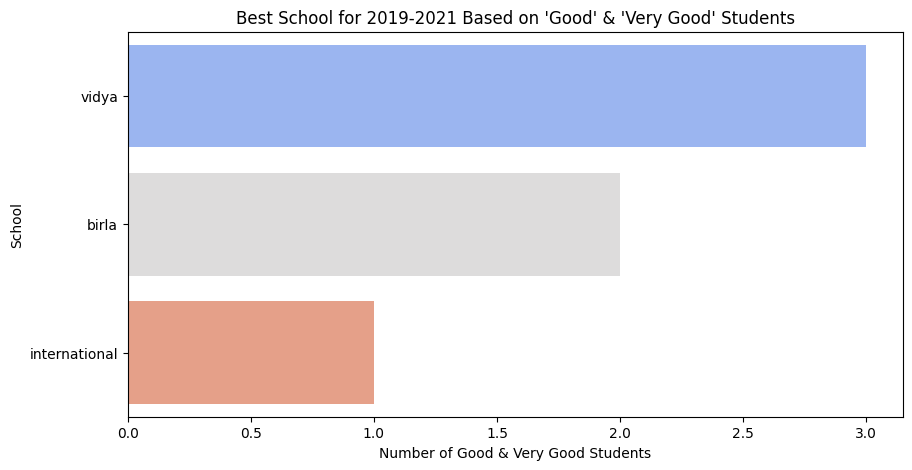

In [24]:
# 6️⃣ Student Category Counts (Stacked Bar Chart)

student_category_counts = pd.read_csv("/student_category_counts.csv")


filtered_data = student_category_counts[student_category_counts["Category"].isin(["Good", "Very Good"])]

best_school_per_year = (
    filtered_data.groupby("School")["Student_Count"].sum().reset_index()
)

best_school_per_year = best_school_per_year.sort_values(by="Student_Count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Student_Count", y="School", data=best_school_per_year, palette="coolwarm")

plt.xlabel("Number of Good & Very Good Students")
plt.ylabel("School")
plt.title("Best School for 2019-2021 Based on 'Good' & 'Very Good' Students")

plt.show()



<ipython-input-30-182e9a53d172>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="total_marks", y="school", data=top_performers, palette="viridis")


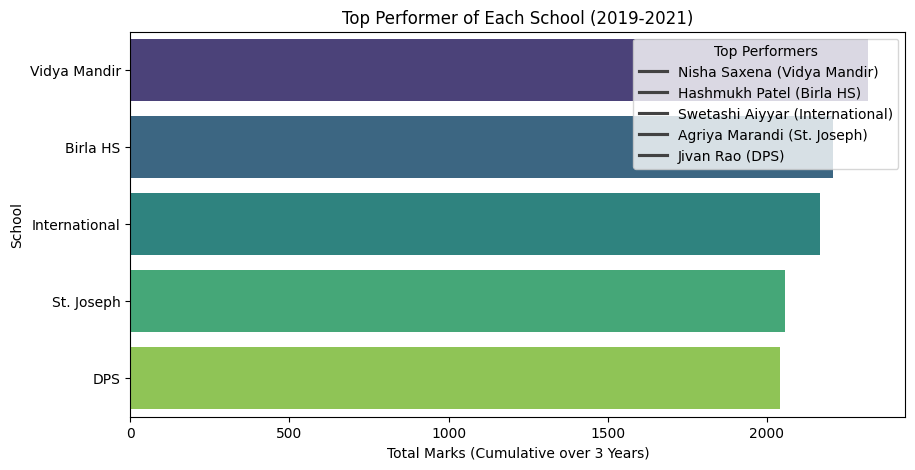

In [30]:

top_performers = pd.read_csv("/top_performers.csv")

top_performers = top_performers.sort_values(by="total_marks", ascending=False)

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x="total_marks", y="school", data=top_performers, palette="viridis")

legend_labels = [f"{row.student_name} ({row.school})" for row in top_performers.itertuples()]
plt.legend(legend_labels, title="Top Performers", loc="upper right", fontsize=10, frameon=True)

plt.xlabel("Total Marks (Cumulative over 3 Years)")
plt.ylabel("School")
plt.title("Top Performer of Each School (2019-2021)")

plt.show()